In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from json_parser_trivy import create_df

In [59]:
df= create_df()
print(df)

           VulnerabilityID           PkgName        Status  Severity Container
0            CVE-2011-3374               apt      affected       LOW     nginx
1      TEMP-0841856-B18BAF              bash      affected       LOW     nginx
2            CVE-2022-0563          bsdutils      affected       LOW     nginx
3            CVE-2016-2781         coreutils  will_not_fix       LOW     nginx
4           CVE-2017-18018         coreutils      affected       LOW     nginx
...                    ...               ...           ...       ...       ...
12284        CVE-2022-0563  util-linux-extra      affected       LOW     irssi
12285        CVE-2022-0563          uuid-dev      affected       LOW     irssi
12286       CVE-2021-31879              wget      affected    MEDIUM     irssi
12287       CVE-2023-45853            zlib1g  will_not_fix  CRITICAL     irssi
12288       CVE-2023-45853        zlib1g-dev  will_not_fix  CRITICAL     irssi

[12289 rows x 5 columns]


<Axes: >

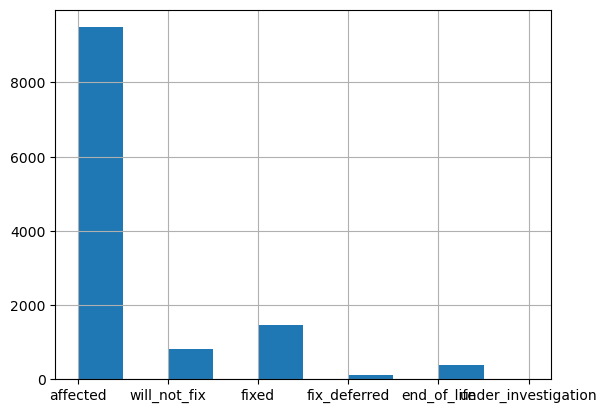

In [3]:
df['Status'].hist()

<Axes: >

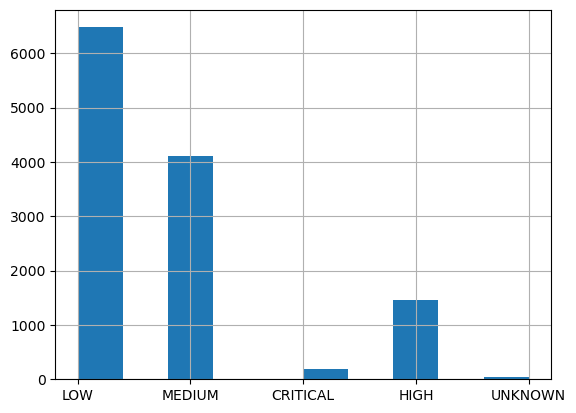

In [4]:
df['Severity'].hist()

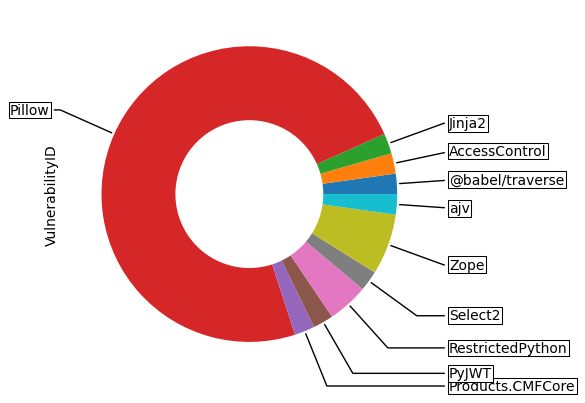

In [4]:
import numpy as np
import random
df_plot = df.groupby(['PkgName']).count().head(10)
axes = df_plot.plot.pie(y='VulnerabilityID', startangle=0, radius=1, legend=None, labels=None, wedgeprops=dict(width=0.5))
wedges = axes.patches
bbox_props = dict(boxstyle="square,pad=0.1", fc="w", ec="k", lw=0.75)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(wedges):
    name_df = df_plot.iloc[[i]].index.tolist()[0]
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    axes.annotate(name_df, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)



In [5]:
containers = df['Container'].unique()

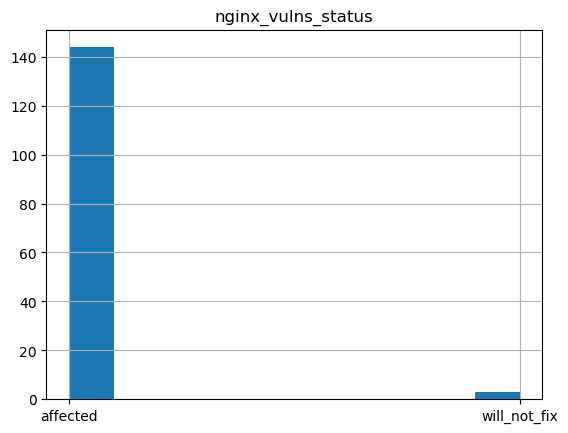

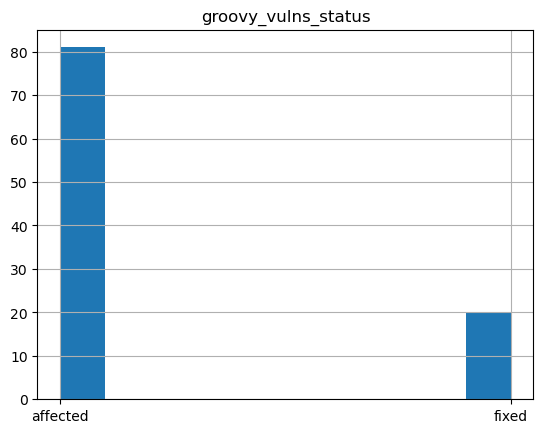

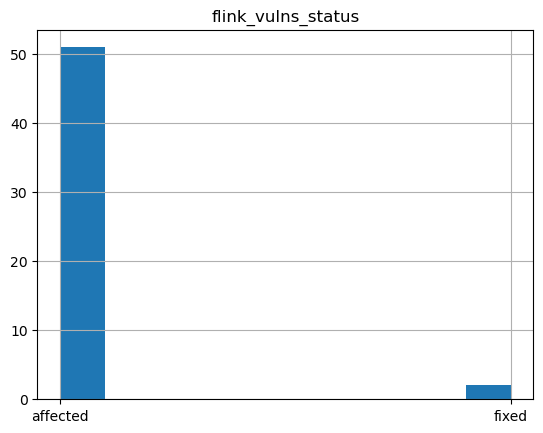

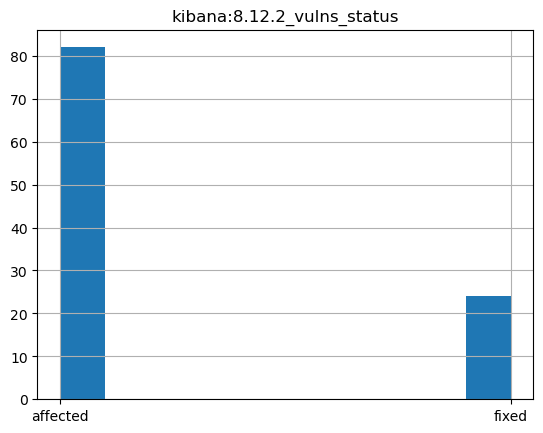

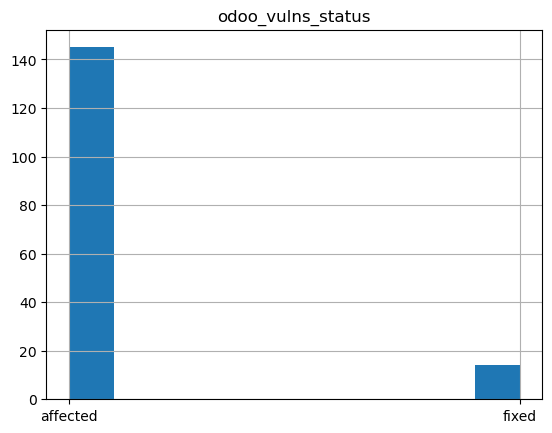

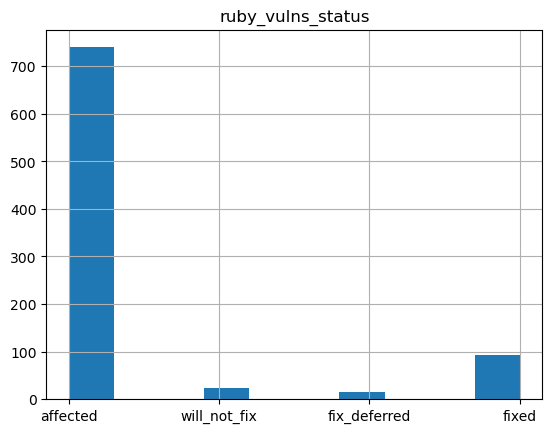

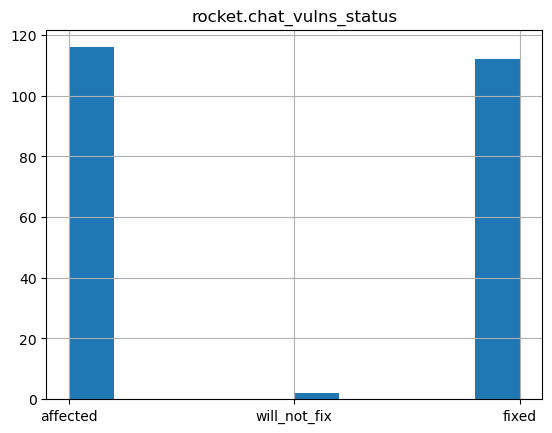

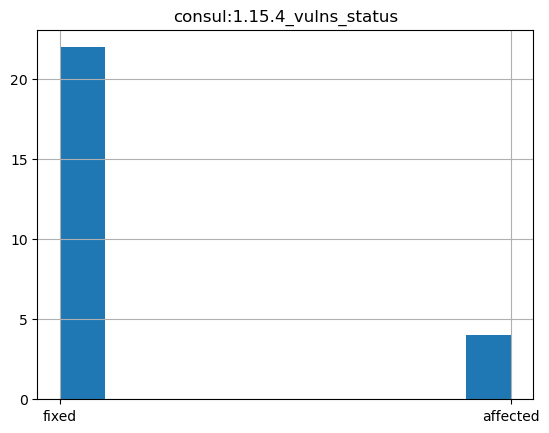

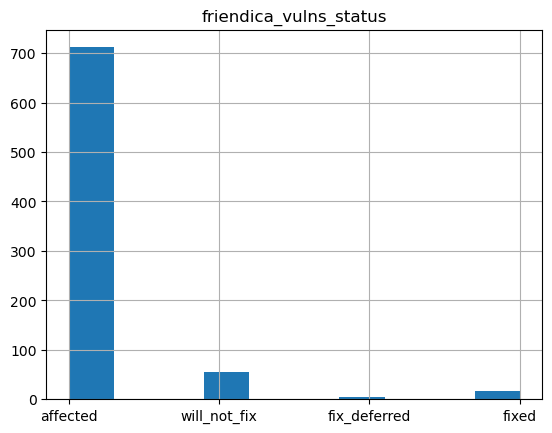

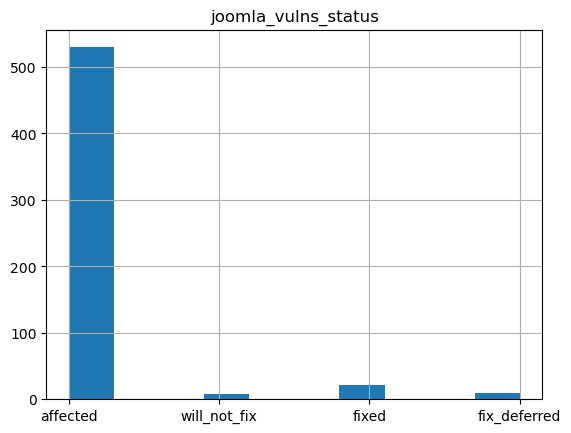

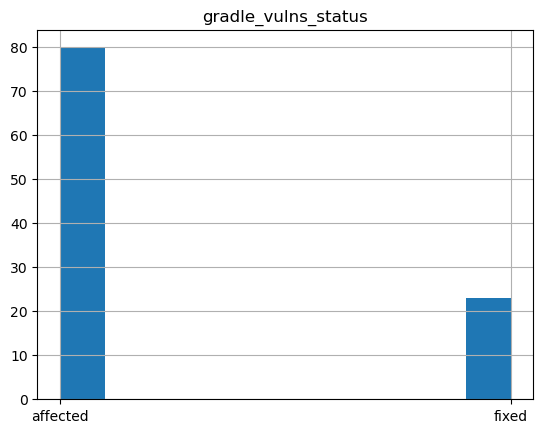

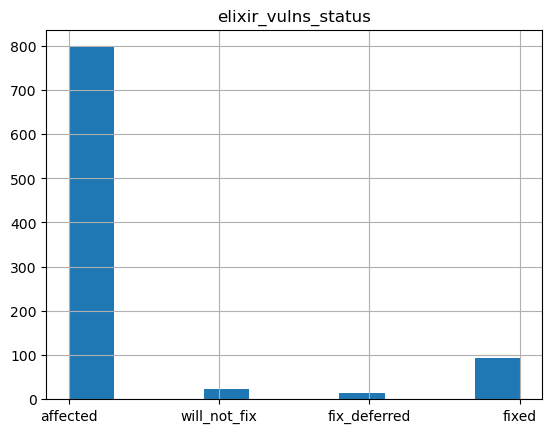

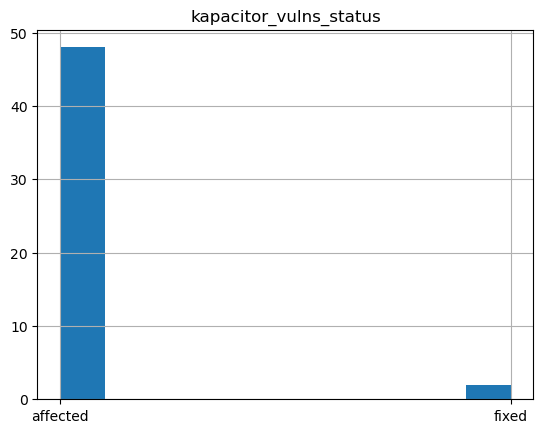

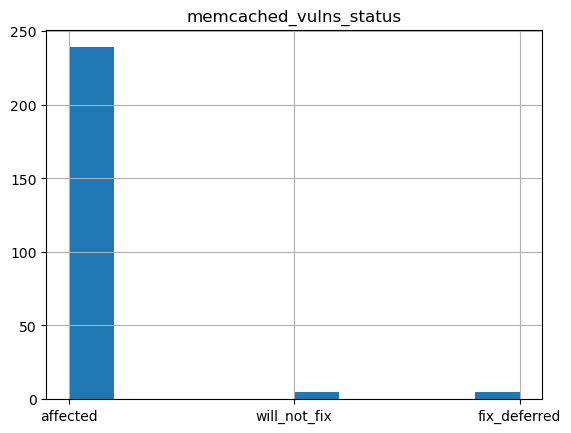

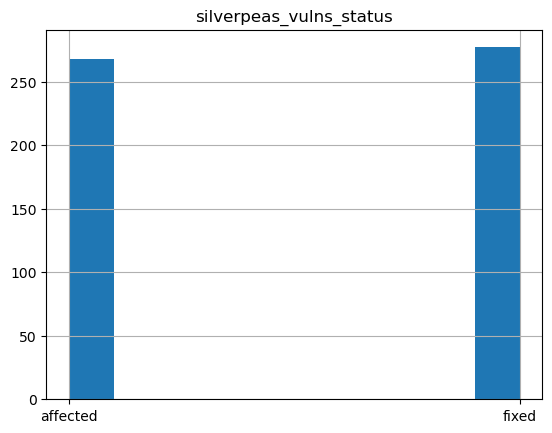

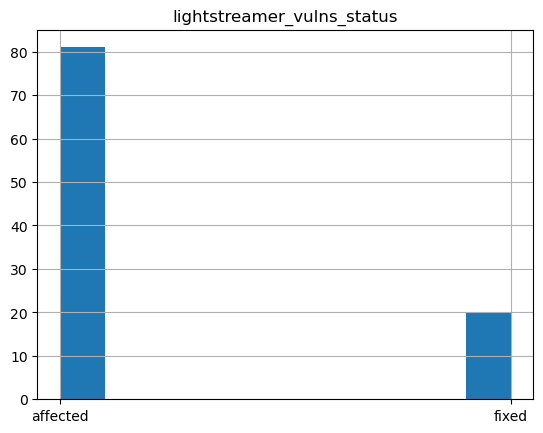

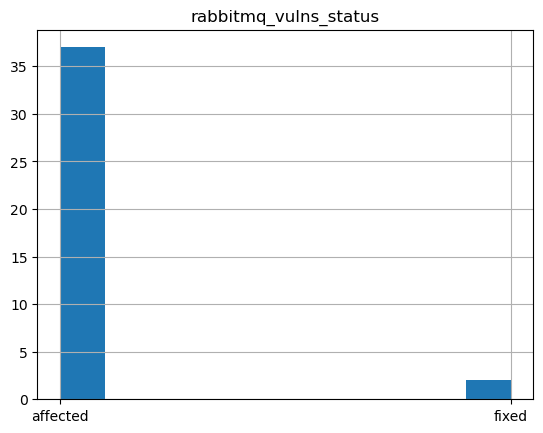

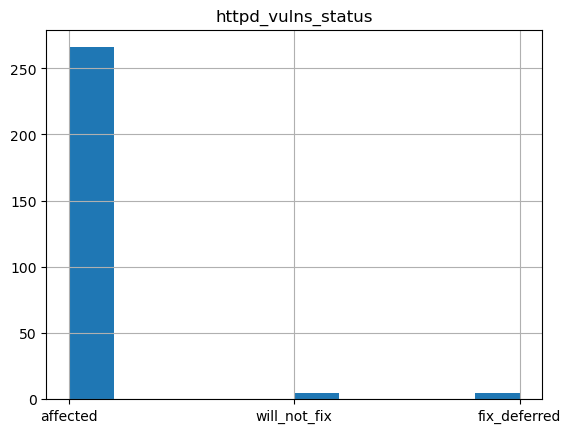

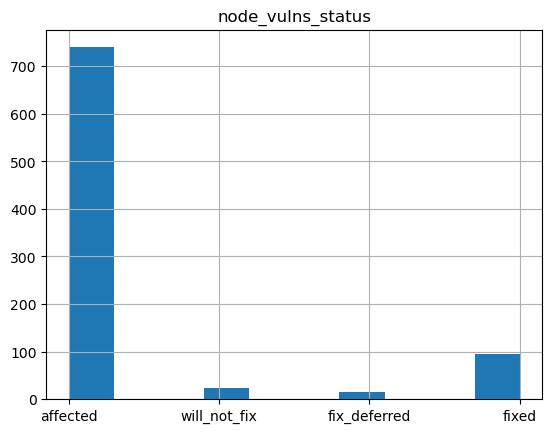

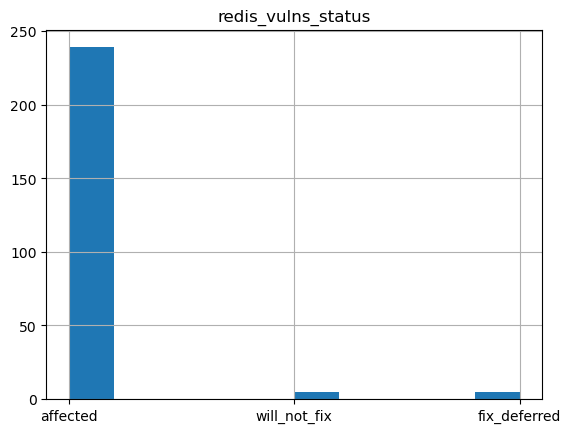

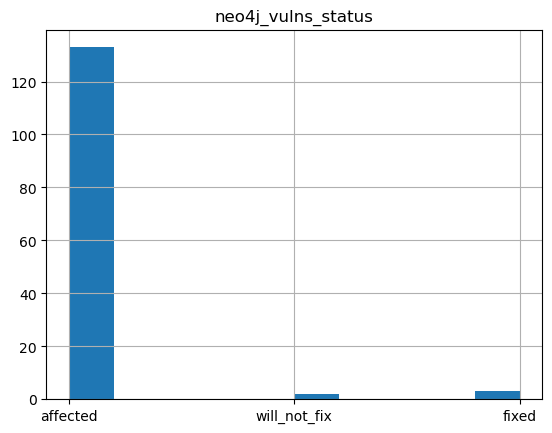

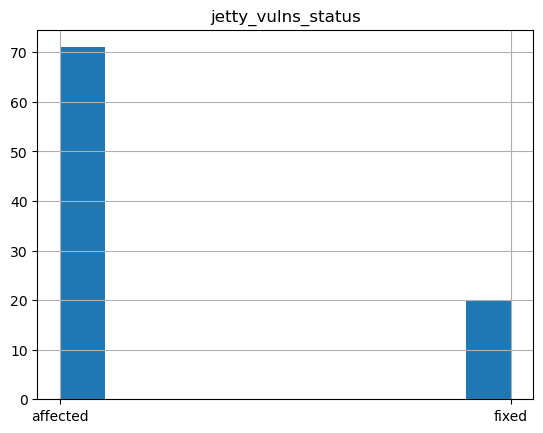

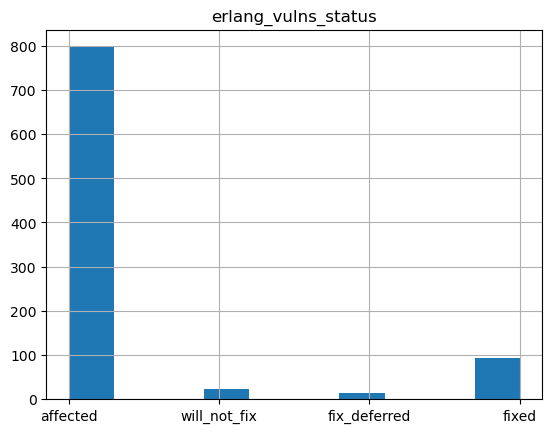

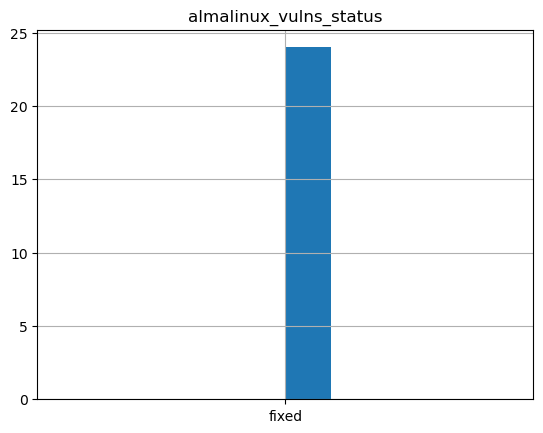

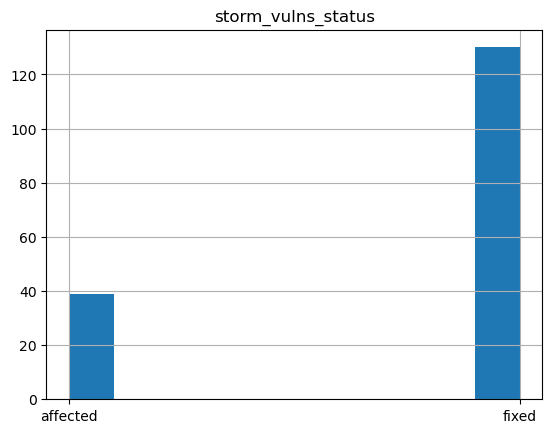

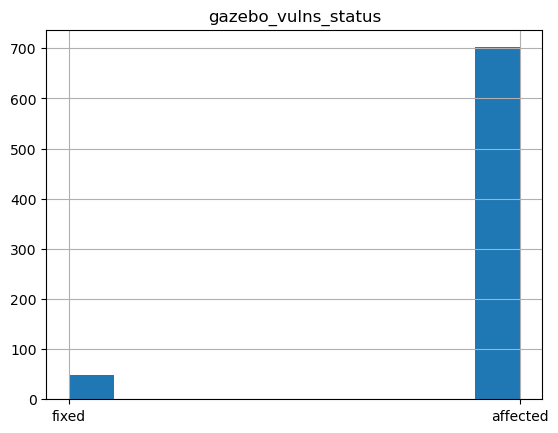

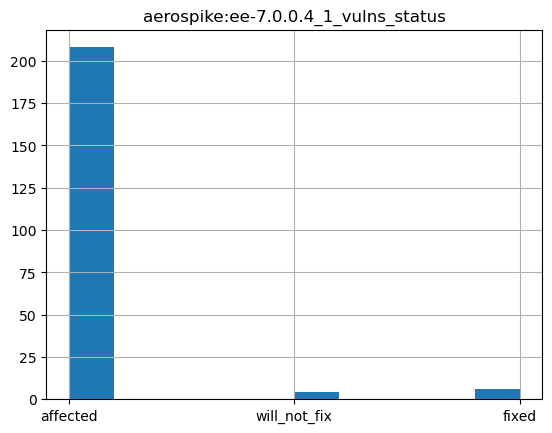

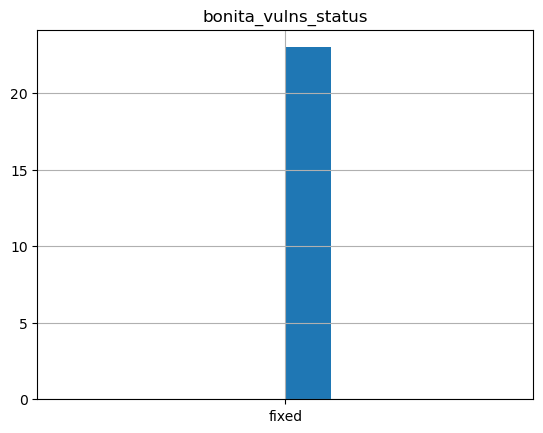

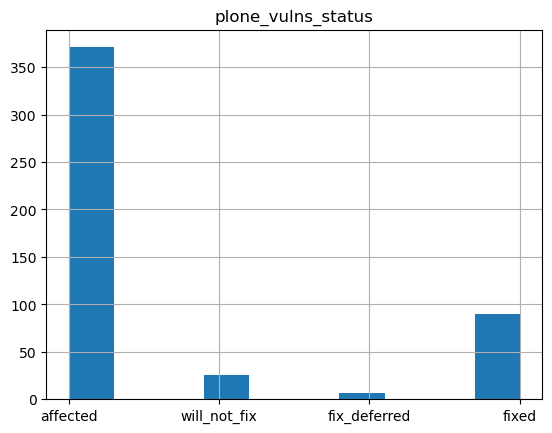

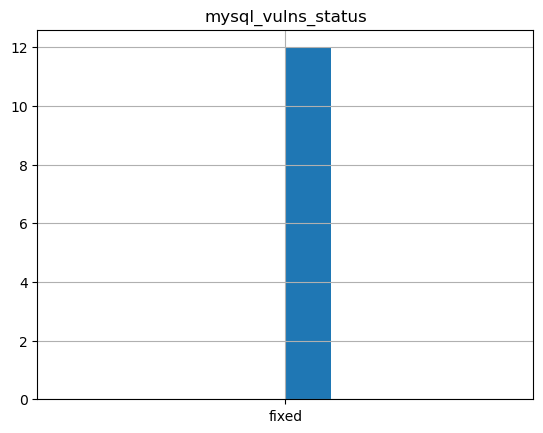

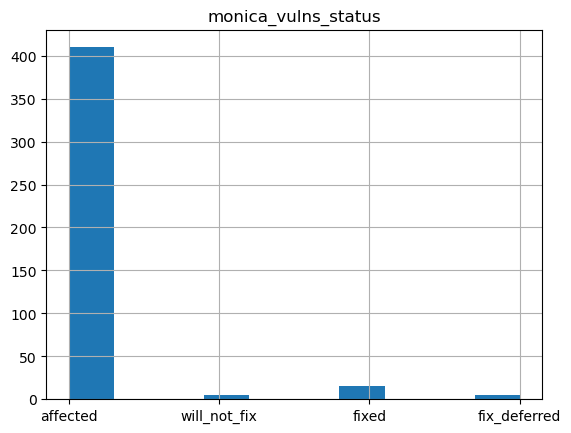

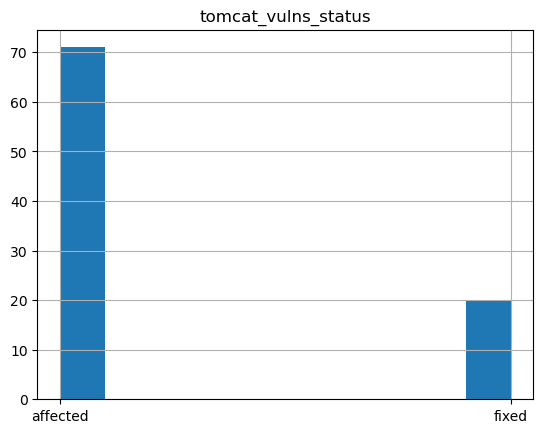

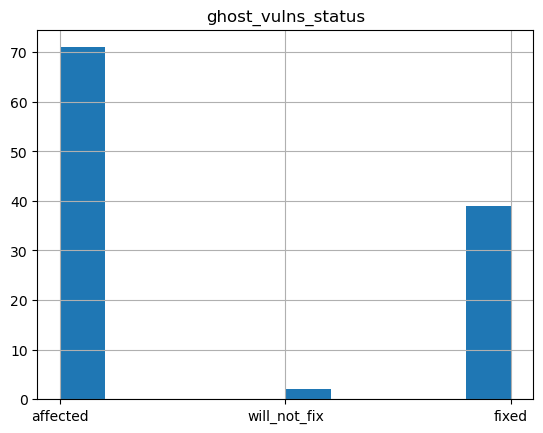

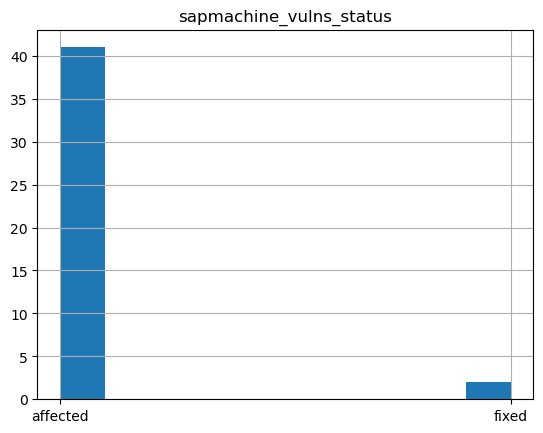

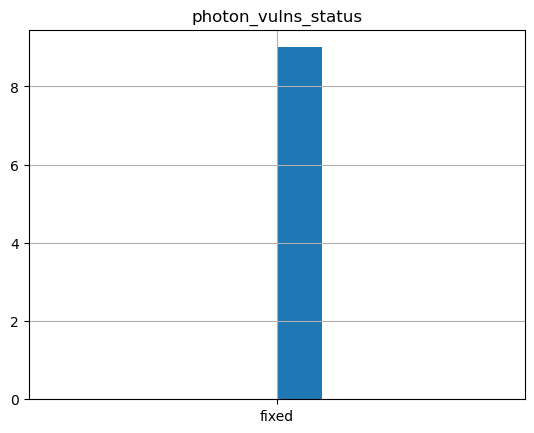

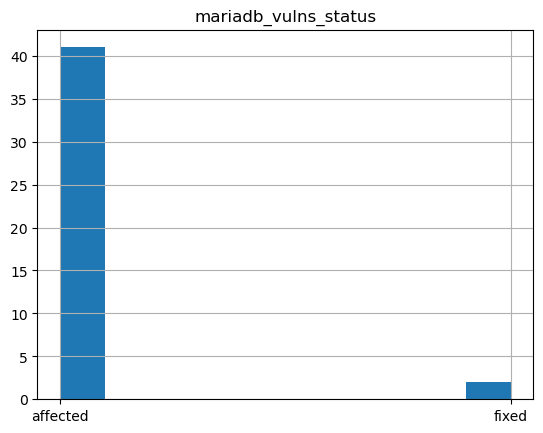

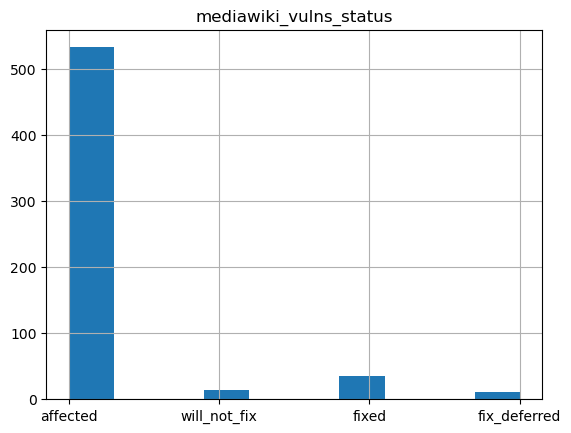

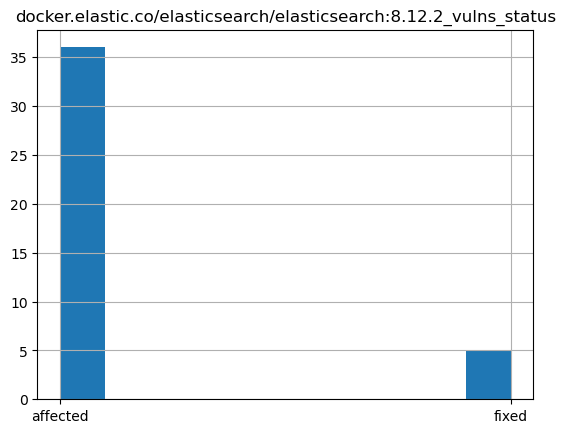

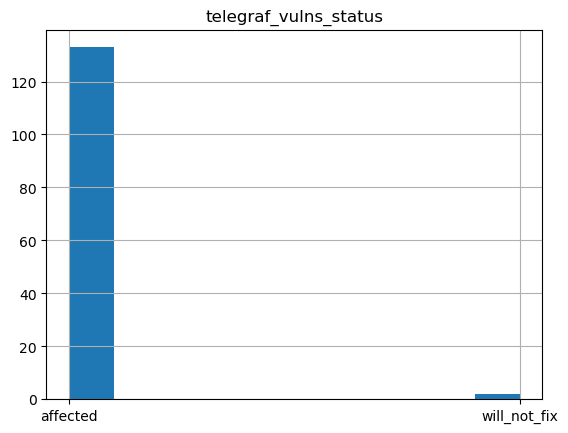

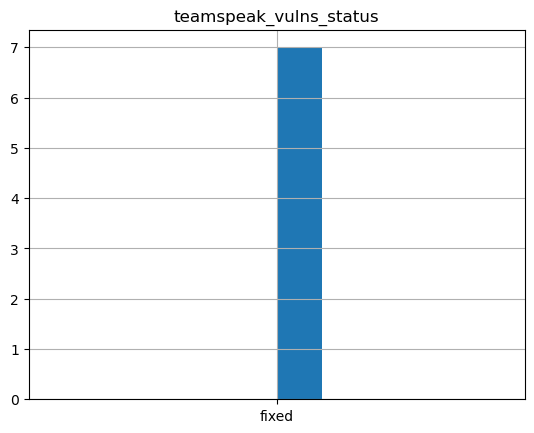

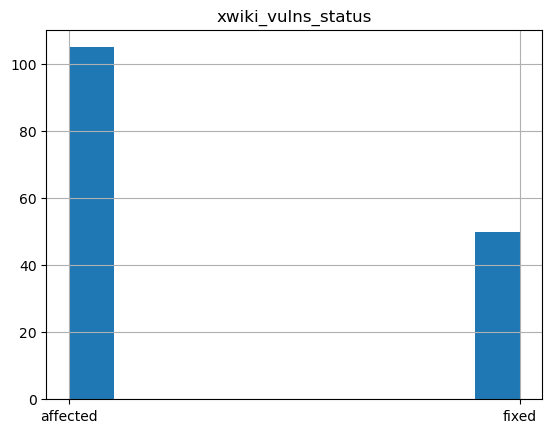

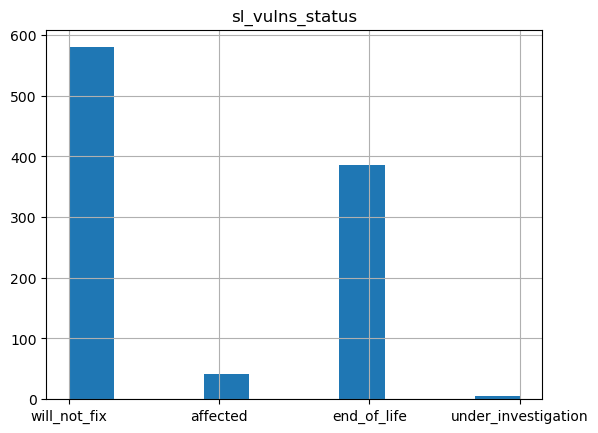

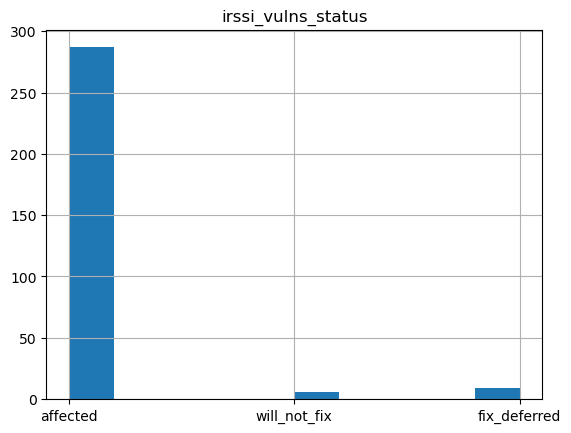

In [6]:
for container in containers:
    df.loc[df['Container'] == container]['Status'].hist()
    plt.title(container+"_vulns_status")
    plt.show()

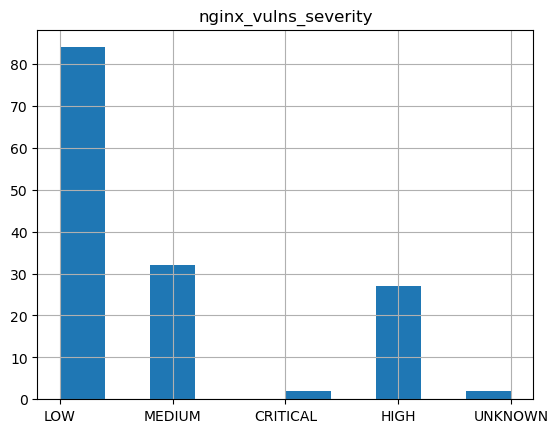

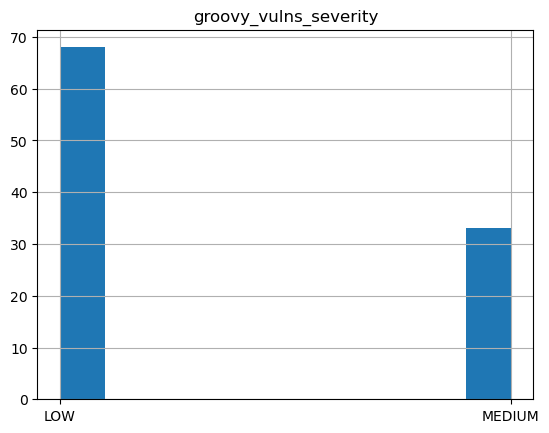

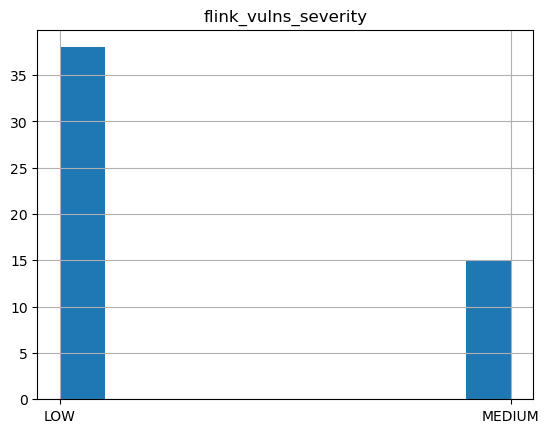

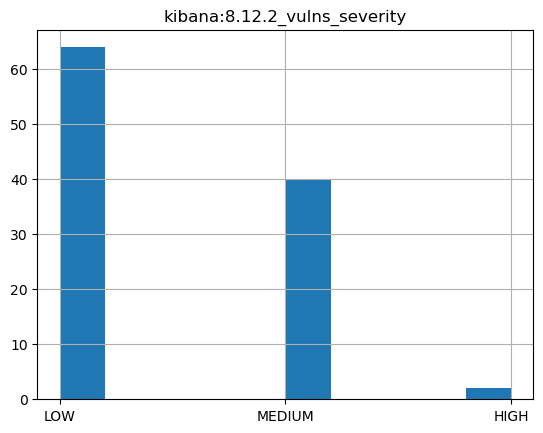

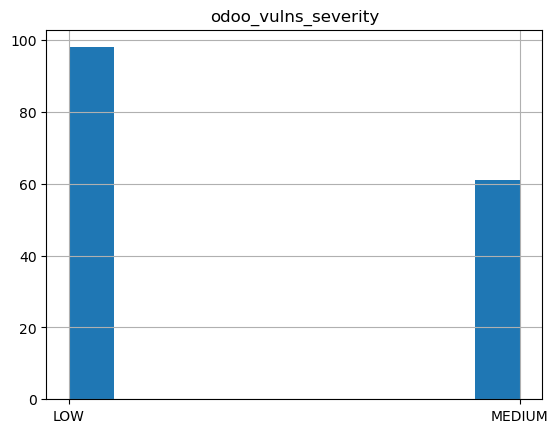

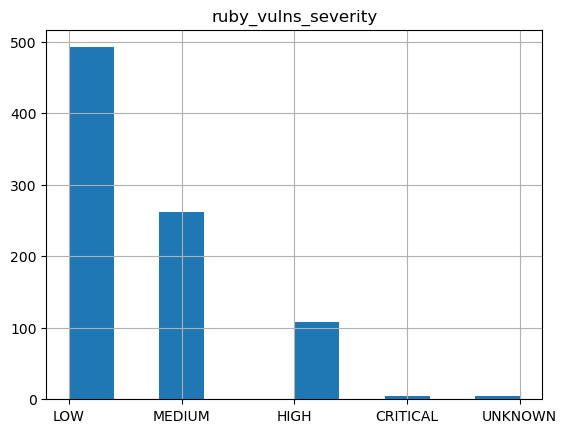

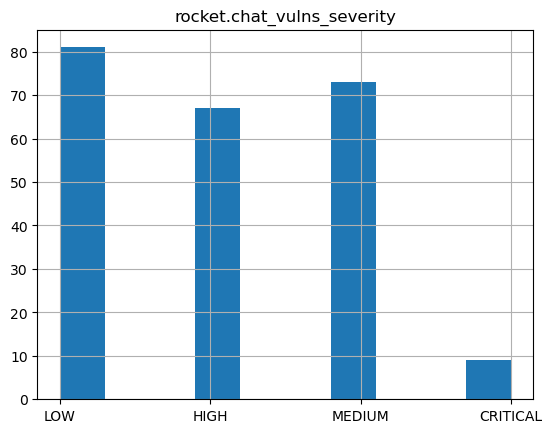

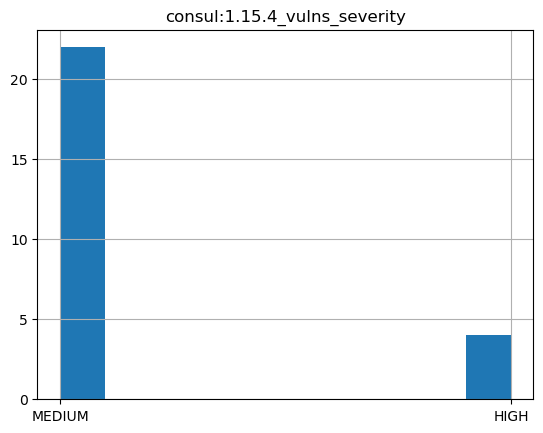

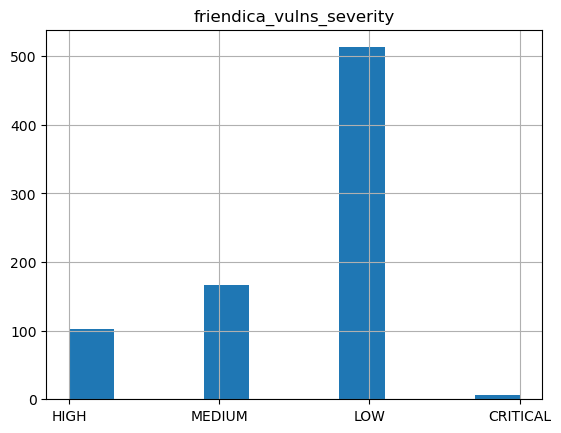

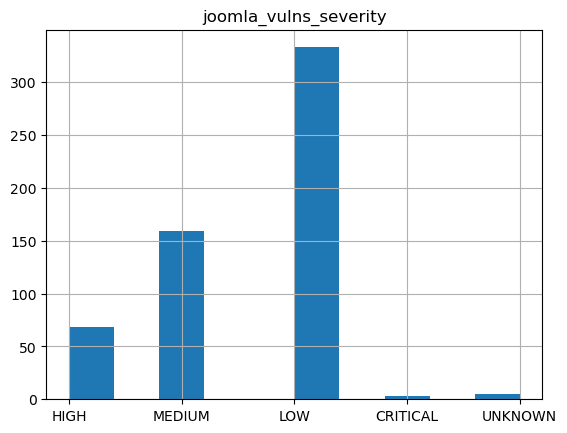

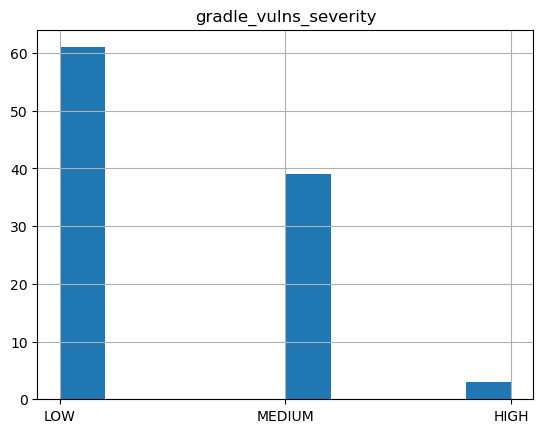

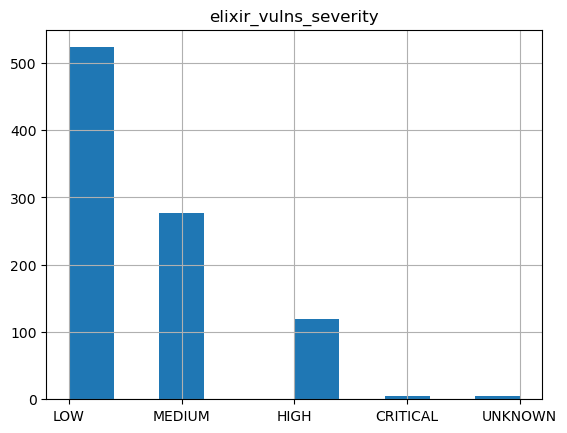

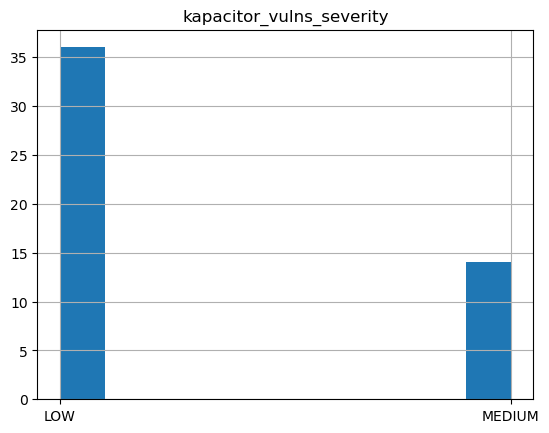

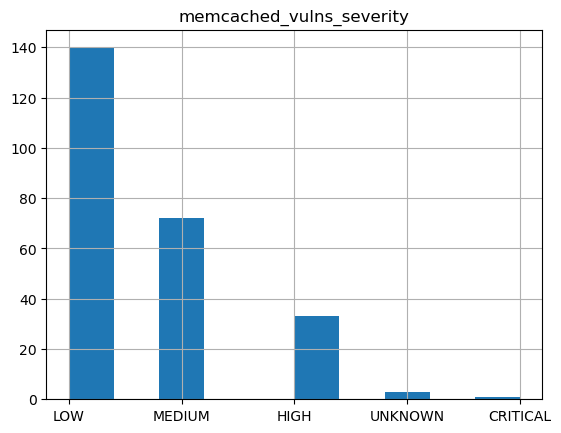

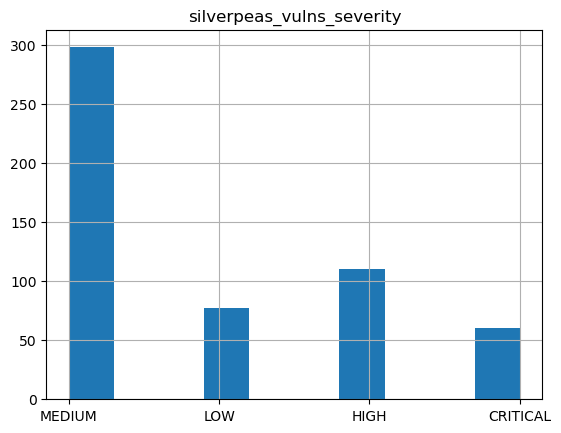

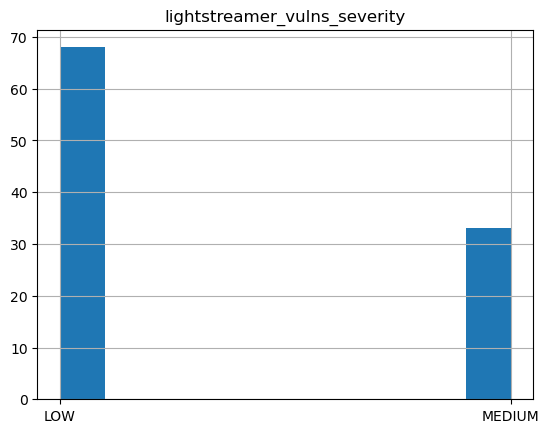

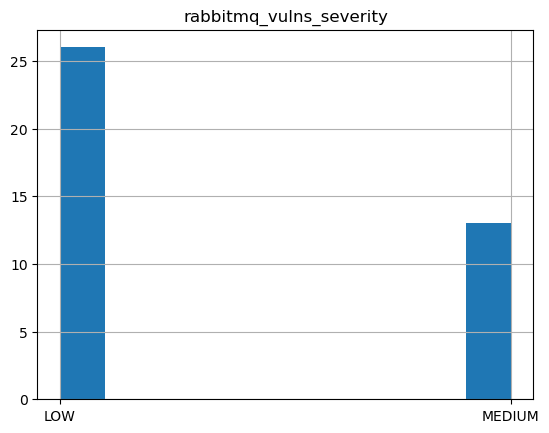

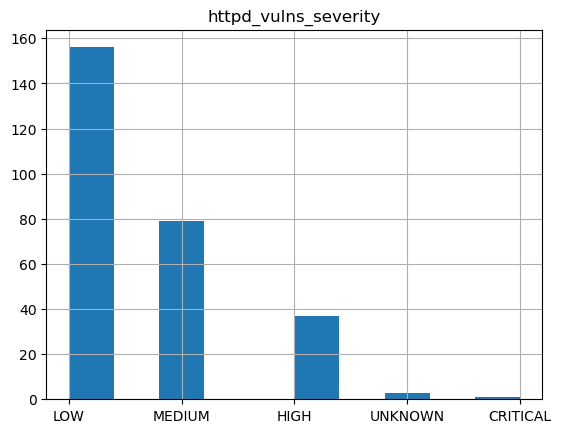

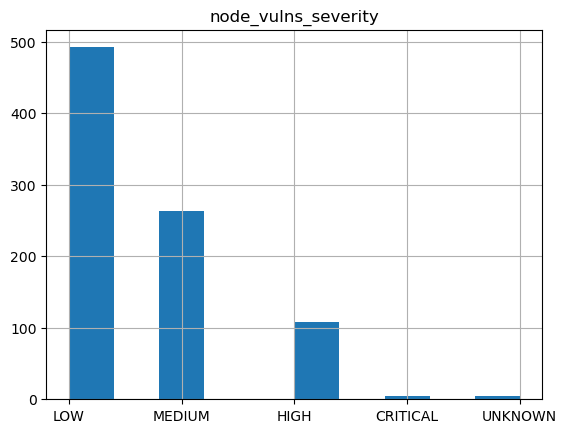

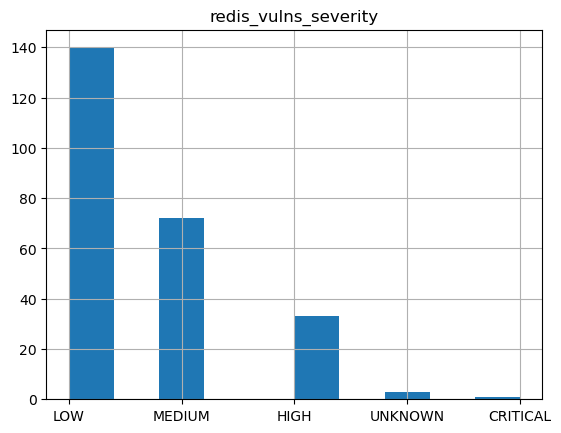

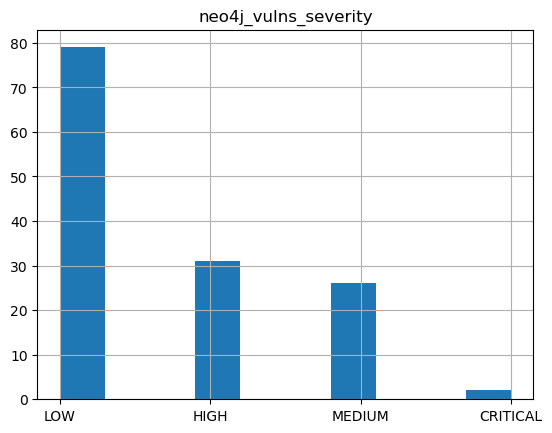

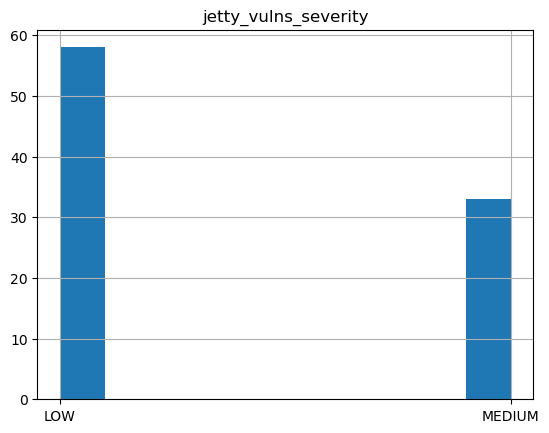

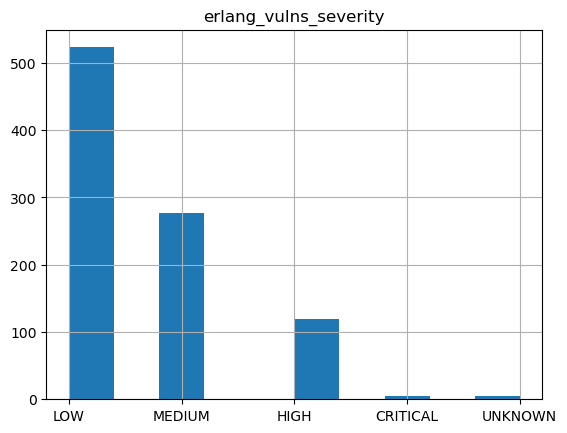

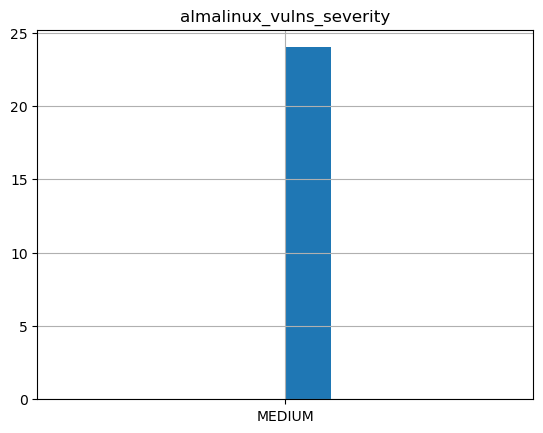

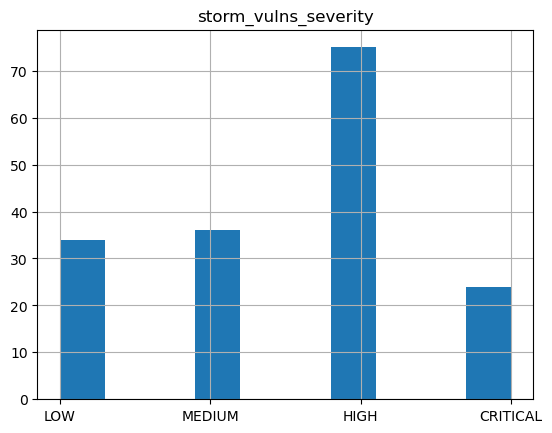

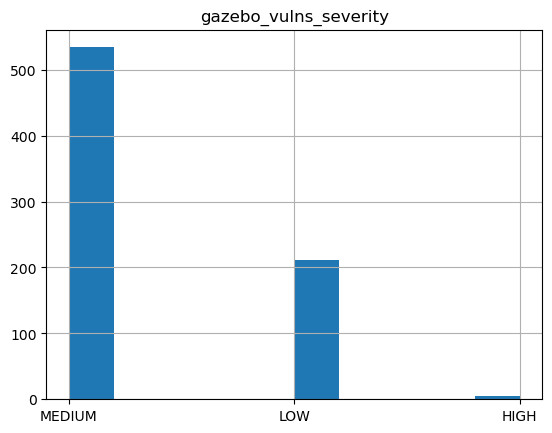

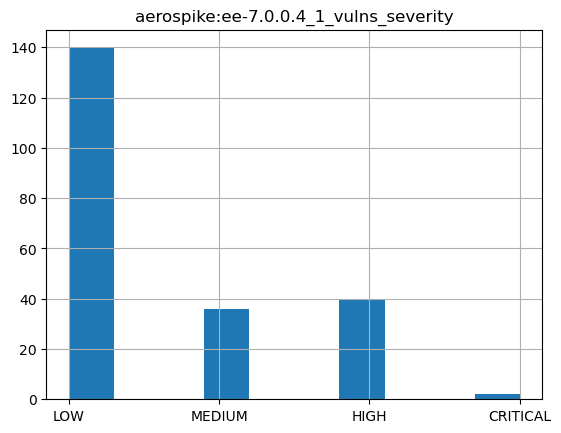

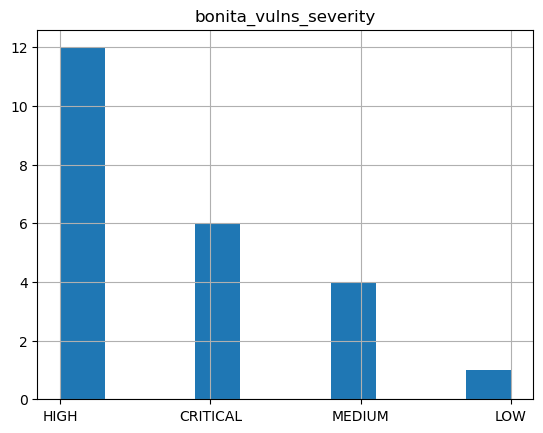

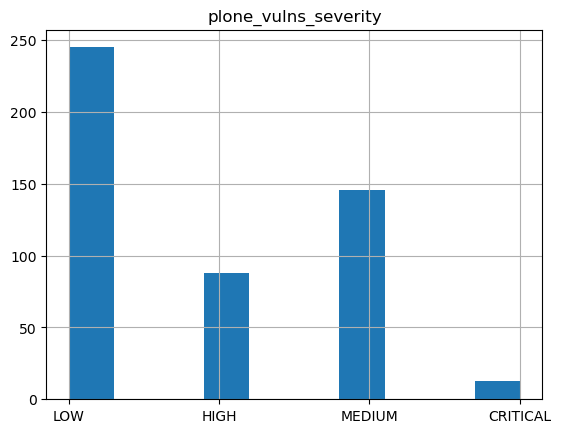

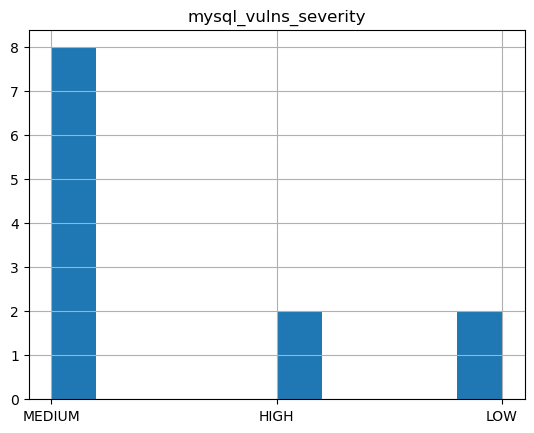

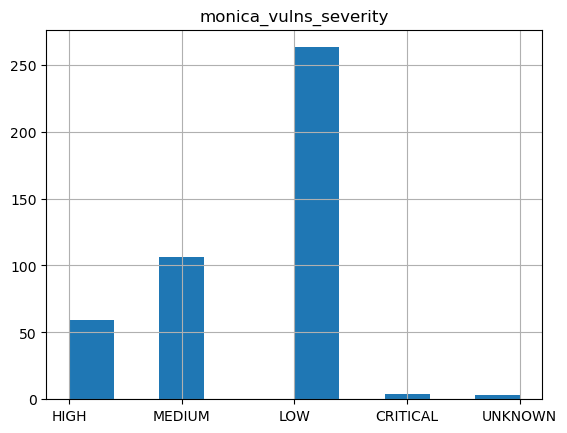

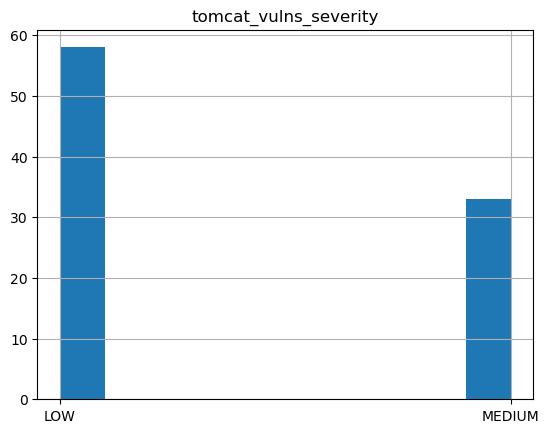

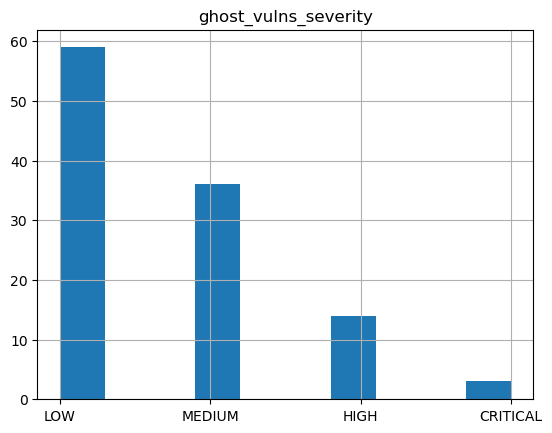

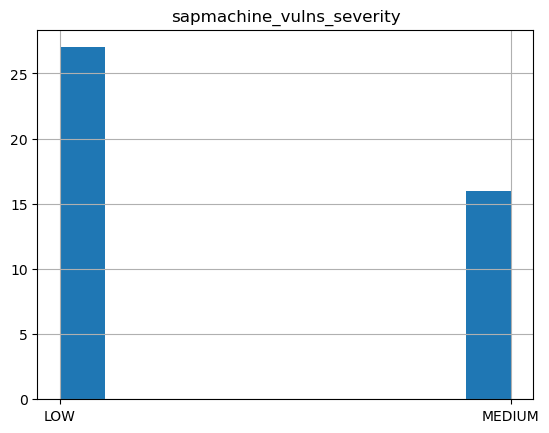

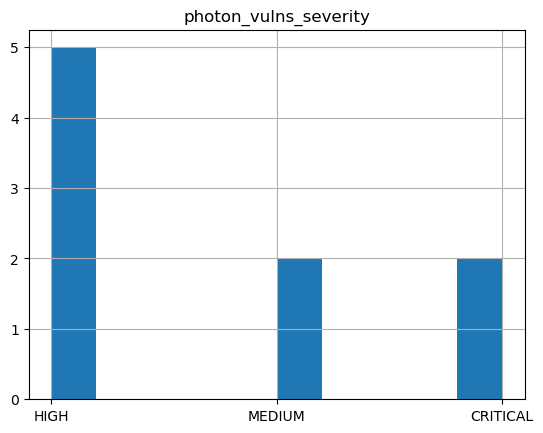

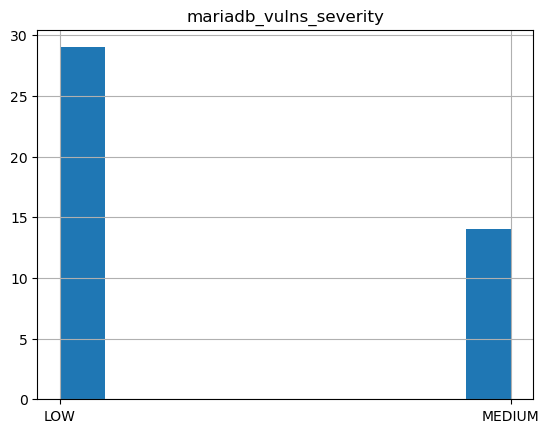

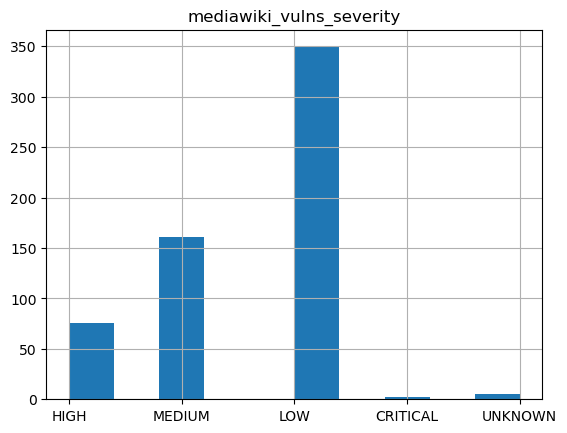

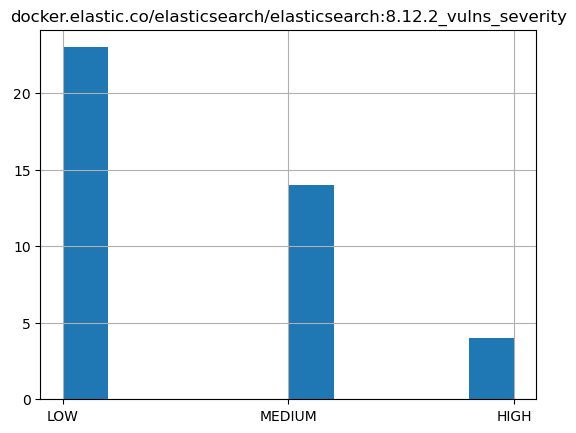

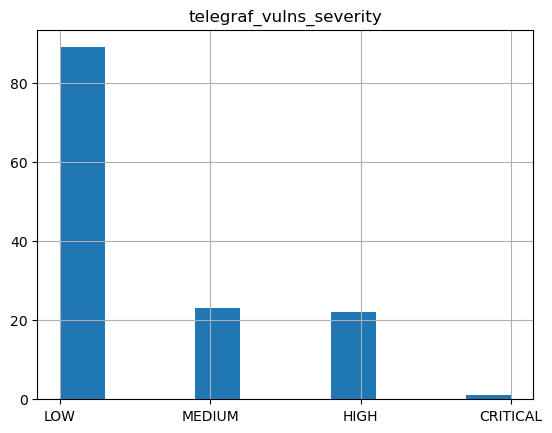

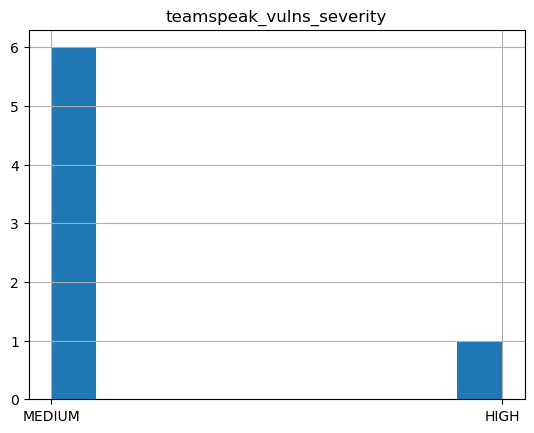

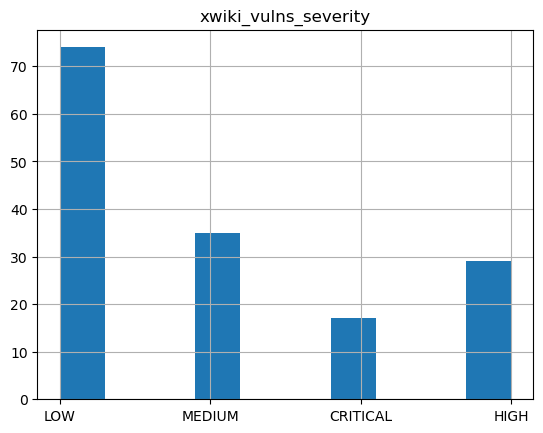

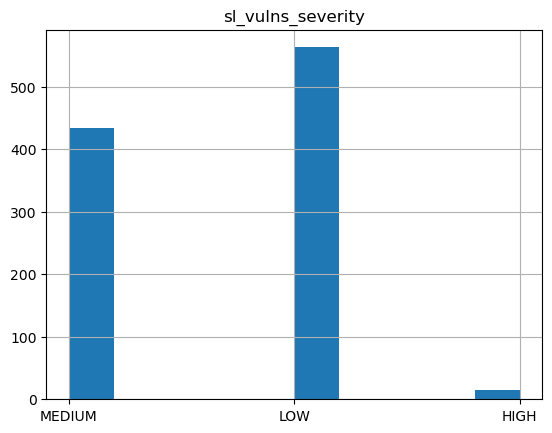

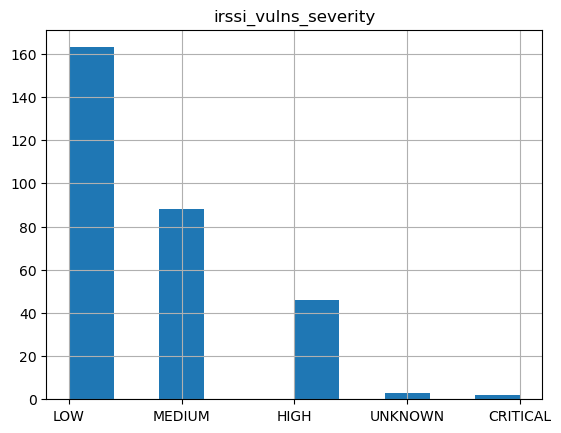

In [7]:
for container in containers:
    df.loc[df['Container'] == container]['Severity'].hist()
    plt.title(container+"_vulns_severity")
    plt.show()

In [12]:
len(df.loc[df['Severity'] == "CRITICAL"])

181

In [14]:
len(df.loc[df['Container'] == "ruby"])

872

In [16]:
dfa = df.loc[df['Container'] == "ruby"]
len(dfa.loc[dfa['Severity'] == "CRITICAL"])

5

In [12]:
df_aff = df.loc[df['Container'].isin(["almalinux", "eggdrop", "teamspeak", "nats", "busybox", "photon", "sl", "traefik"])]
print(df_aff)

      VulnerabilityID      PkgName       Status Severity  Container
7610    CVE-2023-5981       gnutls        fixed   MEDIUM  almalinux
7611    CVE-2024-0553       gnutls        fixed   MEDIUM  almalinux
7612    CVE-2024-0567       gnutls        fixed   MEDIUM  almalinux
7613   CVE-2023-39615      libxml2        fixed   MEDIUM  almalinux
7614    CVE-2023-5363      openssl        fixed   MEDIUM  almalinux
...               ...          ...          ...      ...        ...
11982   CVE-2023-5344  vim-minimal  end_of_life      LOW         sl
11983   CVE-2023-5441  vim-minimal  end_of_life      LOW         sl
11984   CVE-2023-5535  vim-minimal  end_of_life      LOW         sl
11985  CVE-2024-22667  vim-minimal  end_of_life      LOW         sl
11986  CVE-2023-45853         zlib  end_of_life   MEDIUM         sl

[1052 rows x 5 columns]


In [13]:
print(df_aff.loc[df_aff['Status'].isin(["affected"])])

      VulnerabilityID           PkgName    Status Severity Container
10978   CVE-2023-4408  bind-export-libs  affected     HIGH        sl
10979  CVE-2023-50387  bind-export-libs  affected     HIGH        sl
10980  CVE-2023-50868  bind-export-libs  affected     HIGH        sl
10981   CVE-2023-5517  bind-export-libs  affected     HIGH        sl
10982   CVE-2023-5679  bind-export-libs  affected     HIGH        sl
10983   CVE-2023-6516  bind-export-libs  affected     HIGH        sl
10988   CVE-2023-4408      bind-license  affected     HIGH        sl
10989  CVE-2023-50387      bind-license  affected     HIGH        sl
10990  CVE-2023-50868      bind-license  affected     HIGH        sl
10991   CVE-2023-5517      bind-license  affected     HIGH        sl
10992   CVE-2023-5679      bind-license  affected     HIGH        sl
10993   CVE-2023-6516      bind-license  affected     HIGH        sl
11012   CVE-2014-9939          binutils  affected      LOW        sl
11144  CVE-2019-17450          bin

In [61]:
df = df[~df['VulnerabilityID'].str.contains('CVE', na=False)]
print(df)
df = df[~df['VulnerabilityID'].str.contains('TEMP', na=False)]
print(df)

           VulnerabilityID         PkgName    Status Severity Container
1      TEMP-0841856-B18BAF            bash  affected      LOW     nginx
118    TEMP-0628843-DBAD28           login  affected      LOW     nginx
137    TEMP-0628843-DBAD28          passwd  affected      LOW     nginx
141    TEMP-0517018-A83CE6  sysvinit-utils  affected      LOW     nginx
143    TEMP-0290435-0B57B5             tar  affected      LOW     nginx
...                    ...             ...       ...      ...       ...
12236  TEMP-0000000-F7A20F  linux-libc-dev  affected      LOW     irssi
12244  TEMP-0628843-DBAD28           login  affected      LOW     irssi
12260  TEMP-0628843-DBAD28          passwd  affected      LOW     irssi
12280  TEMP-0517018-A83CE6  sysvinit-utils  affected      LOW     irssi
12282  TEMP-0290435-0B57B5             tar  affected      LOW     irssi

[168 rows x 5 columns]
           VulnerabilityID                     PkgName    Status  Severity  \
348    GHSA-36jr-mh4h-2g58        